# **Animal-detection-with-modified-YOLOv5s (Small)**

## **Drive mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Downloading YOLOv5**

In [2]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
!pip install -r requirements.txt  # install

Cloning into 'yolov5'...
remote: Enumerating objects: 13190, done.
remote: Counting objects: 100% (346/346), done.
remote: Compressing objects: 100% (159/159), done.
remote: Total 13190 (delta 239), reused 275 (delta 187), pack-reused 12844
Receiving objects: 100% (13190/13190), 13.17 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (9069/9069), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 


## **Downloading the Dataset from roboflow**



In [ ]:
!pip install roboflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 145 kB 43.3 MB/s 
     |████████████████████████████████| 178 kB 66.6 MB/s 
     |████████████████████████████████| 1.1 MB 44.9 MB/s 
     |████████████████████████████████| 67 kB 5.6 MB/s 
     |████████████████████████████████| 54 kB 3.0 MB/s 
     |████████████████████████████████| 138 kB 22.8 MB/s 
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Created wheel for roboflow: filename=roboflow-0.2.15-py3-none-any.whl size=24936 sha256=0b5deb3493e101303855c523f1d532ecefab393b1be5f929d7808f7f24b37646
  Stored in directory: /root/.cache/pip/wheels/13/e0/a3/fe183fffc3972cb9264e800763d4bbfff80d5309137c410217
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=c676bf9a304cbb73f173ef8ac747326cca3a23b01d8404a45073287f96cbf63d
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37

In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="q4FQkkxEYOVxClvXLjwm")
project = rf.workspace("interview").project("animal-classifier")
dataset = project.version(2).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to animal-classifier-2 in yolov5pytorch:: 100%|██████████| 1122/1122 [00:00<00:00, 2443.16it/s]


## **Training**

In [ ]:
!python train.py --img 640 --batch 16 --epochs 100 --data /content/yolov5/animal-classifier-2/data.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/animal-classifier-2/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-180-g82bec4c Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

## **Inference**

/usr/local/lib/python3.7/dist-packages/torch/hub.py:267: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  "You are about to download and run code from an untrusted repository. In a future release, this won't "
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-3 Python-3.7.14 torch-1.12.1+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 10639080 parameters, 0 gradients, 2

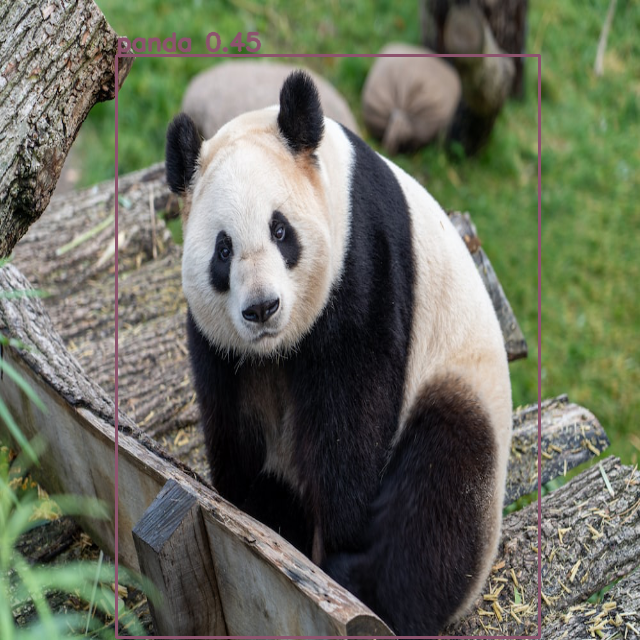

In [3]:
import torch    
import cv2
import numpy as np
import torchvision.transforms as transforms
from PIL import Image

COLORS = np.random.uniform(0, 255, size=(80, 3))

def parse_detections(results):
    detections = results.pandas().xyxy[0]
    detections = detections.to_dict()
    boxes, colors, names = [], [], []
    confidences = []

    for i in range(len(detections["xmin"])):
        confidence = detections["confidence"][i]
        if confidence < 0.2:
            continue
        xmin = int(detections["xmin"][i])
        ymin = int(detections["ymin"][i])
        xmax = int(detections["xmax"][i])
        ymax = int(detections["ymax"][i])
        name = detections["name"][i]
        category = int(detections["class"][i])
        color = COLORS[category]

        boxes.append((xmin, ymin, xmax, ymax))
        colors.append(color)
        names.append(name)
        confidence = np.round(confidence,2)
        confidences.append(confidence)
    return boxes, colors, names, confidences


def draw_detections(boxes, colors, names, confidences, img):
    for box, color, name, confidence in zip(boxes, colors, names, confidences):
        xmin, ymin, xmax, ymax = box
        cv2.rectangle(
            img,
            (xmin, ymin),
            (xmax, ymax),
            color, 
            2)

        cv2.putText(img, name+' '+str(confidence), (xmin, ymin - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2,
                    lineType=cv2.LINE_AA)
    return img


image_path = "/content/drive/MyDrive/notebooks/images/test-panda.jpg"
img = np.array(Image.open(image_path))
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()

model = torch.hub.load('ultralytics/yolov5', 'custom', '/content/drive/MyDrive/notebooks/weights/modified-small/best.pt')
model.eval()
model.cpu()
target_layers = [model.model.model.model[-2]]

results = model([rgb_img])
boxes, colors, names, confidences = parse_detections(results)
detections = draw_detections(boxes, colors, names, confidences, rgb_img.copy())
Image.fromarray(detections)

## **Class Activation Map (CAM)**

In [4]:
!pip install grad-cam

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.8 MB 4.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for grad-cam: filename=grad_cam-1.4.5-py3-none-any.whl size=37027 sha256=931d0d3c63c696a035b8525582883d7b2fa0fc6ef2958d151e99d5ac4581e62a
  Stored in directory: /root/.cache/pip/wheels/f7/c1/fd/59384047f1fab2f99d96b224bdfd0d2b198f896bdb107d66fd
Successfully built grad-cam


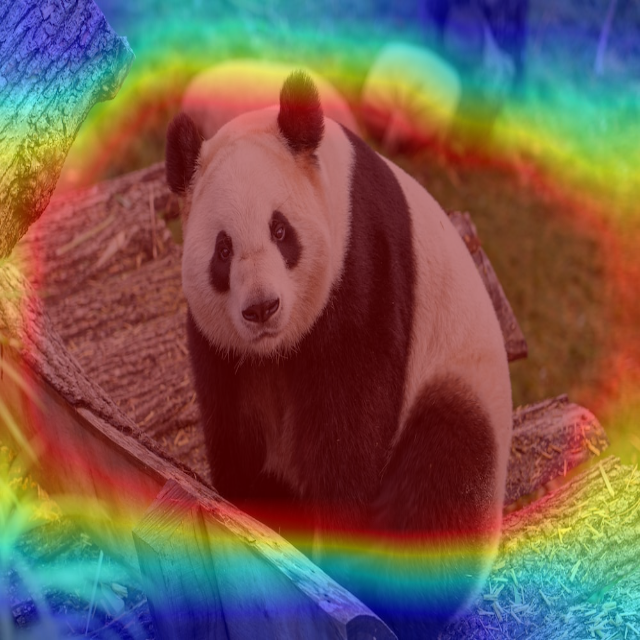

In [5]:
from pytorch_grad_cam import EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image, scale_cam_image

img = np.float32(img) / 255
transform = transforms.ToTensor()
tensor = transform(img).unsqueeze(0)
cam = EigenCAM(model, target_layers, use_cuda=False)
grayscale_cam = cam(tensor)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=False)
Image.fromarray(cam_image)